In [1]:
# Setup
import matplotlib as plt
import numpy as np
from dolo import *
import dolo.algos.perfect_foresight as pf
import dolo.algos.value_iteration as vi
import pandas as pd

# Define a function to handle plots
def plotQmodel(model, exog, returnDF = False):
    
    # Simpulate the optimal response
    dr = pf.deterministic_solve(model = model,shocks = exog,verbose=True)
    
    # Plot exogenous variables
    
    ex = ['R','tau','itc_1','psi']
    fig, axes = plt.pyplot.subplots(1,len(ex), figsize = (10,3))
    axes = axes.flatten()
    
    for i in range(len(ex)):
        ax = axes[i]
        ax.plot(dr[ex[i]],'.')
        ax.set_xlabel('Time')
        ax.set_ylabel(ex[i])
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    fig.suptitle('Exogenous variables', fontsize=16)
    
    # Plot optimal response variables
    fig, axes = plt.pyplot.subplots(2,2, figsize = (10,6))
    axes = axes.flatten()
    opt = ['k','i','lambda_1','q_1']
    
    for i in range(len(opt)):
        ax = axes[i]
        ax.plot(dr[opt[i]],'.')
        ax.set_xlabel('Time')
        ax.set_ylabel(opt[i])
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    fig.suptitle('Endogenous response', fontsize=16)
    
    if returnDF:
        return(dr)

In [2]:
# Load and calibrate the model model
model = yaml_import("../Dolo/Q_model.yaml")

alpha = 0.33
delta = 0.05
omega = 2

model.set_calibration(alpha = alpha, delta = delta, omega = omega)

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


	> 1 | 0.14048699590943958 | 0
	> 2 | 0.06460918192316012 | 0
	> 3 | 0.024789694171920562 | 0
	> 4 | 0.006109614463501778 | 0
	> 5 | 0.0005045496414071149 | 0
	> 6 | 3.4510413717825372e-06 | 0
	> 7 | 1.3903767026590685e-10 | 0
> System was solved after iteration 7. Residual=1.3903767026590685e-10


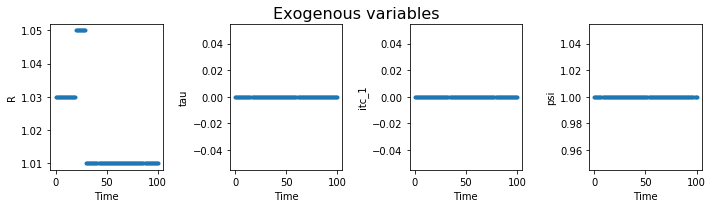

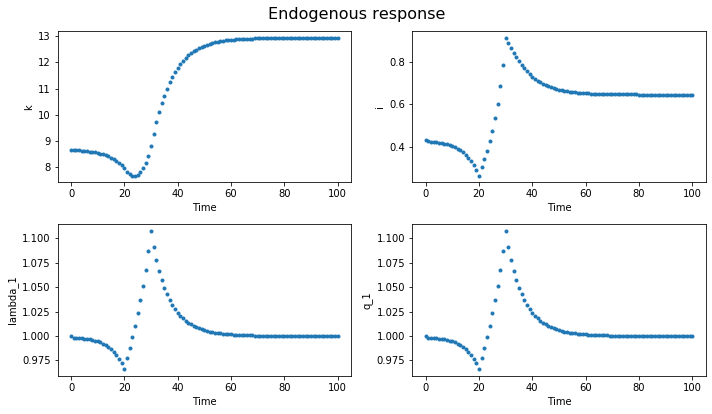

In [3]:
# Interest rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1','psi'])

# Generate an interest rate process
exog.R = np.concatenate((np.repeat(1.03,20),
                    np.repeat(1.05,10),
                    np.repeat(1.01,10)))

# Leave tau at 0
exog.tau = 0
# Leave itc at 0
exog.itc_1 = 0
# Leave psi at 1
exog.psi = 1

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)

	> 1 | 0.13289023443700765 | 0
	> 2 | 0.05903219302955054 | 0
	> 3 | 0.020940175410773754 | 0
	> 4 | 0.004279643589021553 | 0
	> 5 | 0.00022697347171840576 | 0
	> 6 | 6.05465881209355e-07 | 0
> System was solved after iteration 6. Residual=6.05465881209355e-07


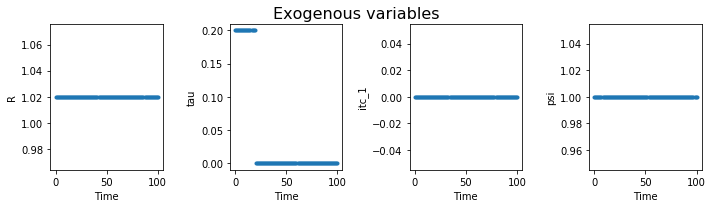

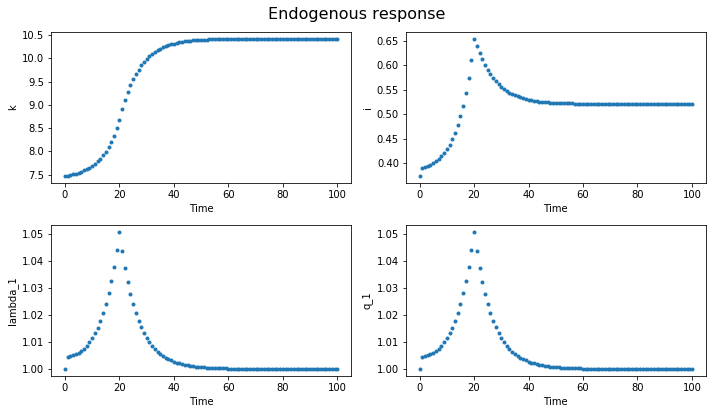

In [4]:
# Tax rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1','psi'])

# Generate a future tax cut dynamic
exog.tau = np.concatenate((np.repeat(0.2,20),
                           np.repeat(0,20)))

# Leave R at 1.02
exog.R = 1.02
# Leave itc at 0
exog.itc_1 = 0
# Leave psi at 0
exog.psi = 1

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)

	> 1 | 0.14653836565675726 | 0
	> 2 | 0.06931635691225979 | 0
	> 3 | 0.02830356274298018 | 0
	> 4 | 0.008059732266770259 | 0
	> 5 | 0.0009327825001961276 | 0
	> 6 | 1.3180564475634426e-05 | 0
	> 7 | 2.1498965940836e-09 | 0
> System was solved after iteration 7. Residual=2.1498965940836e-09


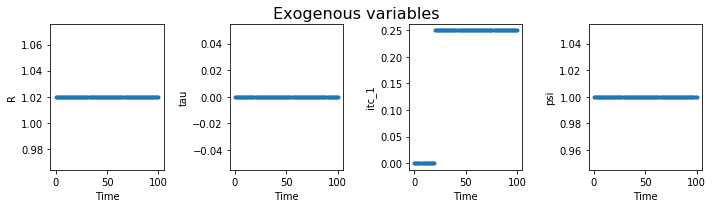

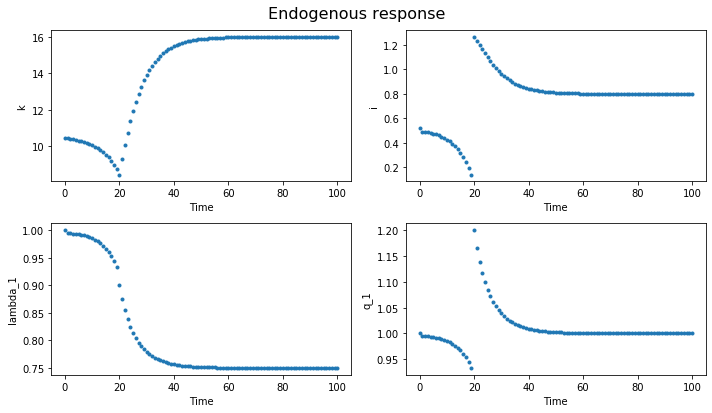

In [5]:
# ITC simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1','psi'])

# Generate a future itc increase dynamic
exog.itc_1 = np.concatenate((np.repeat(0,20),
                           np.repeat(0.25,20)))

# Leave R at 1.02
exog.R = 1.02
# Leave tau at 0
exog.tau = 0
# Leave psi at 1
exog.psi = 1

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)